In [97]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from scipy import signal
from scipy.interpolate import interp1d
import utils
import importlib
_=importlib.reload(utils)

In [98]:
multi_batch_size=500 # Probably best is 500
multi_epochs=2       # Probably best is around 10-30
bin_batch_size=100 # best is 100
bin_epochs=2      # best is 200
verbosity=True
val_split=0.2

In [99]:
x_multi,x_multi_test,y_multi,y_multi_test=utils.import_set(oversampling=True,
                                                           binary_set=False)

x_bin,x_bin_test,y_bin,y_bin_test=utils.import_set(oversampling=True,
                                                   binary_set=True)

In [100]:
model_multi_cnn=tf.keras.Sequential()
model_multi_mlp=tf.keras.Sequential()
model_bin_cnn=tf.keras.Sequential()
model_bin_mlp=tf.keras.Sequential()

utils.archi_cnn(model_multi_cnn,binary=False)
utils.archi_cnn(model_bin_cnn,binary=True)
utils.archi_mlp(model_multi_mlp,binary=False)
utils.archi_mlp(model_bin_mlp,binary=True)

In [101]:
model_multi_cnn.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_multi_mlp.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_bin_cnn.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_bin_mlp.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [102]:
res_multi_cnn=model_multi_cnn.fit(x_multi.reshape([x_multi.shape[0], 187, 1]),
                                  y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Epoch 1/2
105/570 [====>.........................] - ETA: 1:47 - loss: 1.2246 - accuracy: 0.6226

KeyboardInterrupt: ignored

In [103]:
res_multi_mlp=model_multi_mlp.fit(x_multi,y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Epoch 1/2
570/570 [==============================] - 5s 7ms/step - loss: 0.8110 - accuracy: 0.7701 - val_loss: 0.4754 - val_accuracy: 0.8839
Epoch 2/2
570/570 [==============================] - 5s 9ms/step - loss: 0.4541 - accuracy: 0.8874 - val_loss: 0.3511 - val_accuracy: 0.9206


In [104]:
res_bin_cnn=model_bin_cnn.fit(x_bin.reshape([x_bin.shape[0], 187, 1]),
                              y_bin,batch_size=bin_batch_size,epochs=bin_epochs,
                              verbose=verbosity,validation_split=val_split)

Epoch 1/2
120/120 [==============================] - 7s 49ms/step - loss: 0.5697 - accuracy: 0.7199 - val_loss: 0.6955 - val_accuracy: 0.5059
Epoch 2/2
120/120 [==============================] - 6s 47ms/step - loss: 0.3964 - accuracy: 0.8302 - val_loss: 0.6315 - val_accuracy: 0.7743


In [105]:
res_bin_mlp=model_bin_mlp.fit(x_bin,y_bin,batch_size=bin_batch_size,
                              epochs=bin_epochs,verbose=verbosity,
                              validation_split=val_split)

Epoch 1/2
120/120 [==============================] - 1s 5ms/step - loss: 0.7306 - accuracy: 0.7207 - val_loss: 0.5557 - val_accuracy: 0.8153
Epoch 2/2
120/120 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.8078 - val_loss: 0.4518 - val_accuracy: 0.8307


In [ ]:
utils.evaluate('Multi-Class-CNN',res_multi_cnn,
                x_multi_test.reshape([x_multi_test.shape[0],187,1]),
                y_multi_test,is_multi=True,verbose=verbosity)

685/685 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     18118
         1.0       0.35      0.38      0.37       556
         2.0       0.76      0.80      0.78      1448
         3.0       0.36      0.70      0.48       162
         4.0       0.95      0.89      0.92      1608

    accuracy                           0.92     21892
   macro avg       0.68      0.75      0.70     21892
weighted avg       0.93      0.92      0.92     21892

Multi-Class-MLP evaluation:
685/685 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.9195
loss = 0.3817920982837677
accuarcy = 0.919514000415802


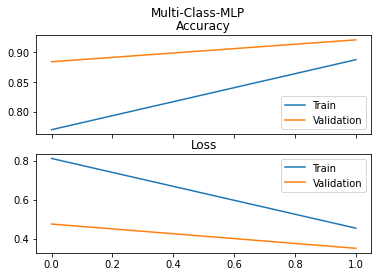

In [107]:
utils.evaluate('Multi-Class-MLP',res_multi_mlp,x_multi_test,y_multi_test,
                is_multi=True,verbose=verbosity)

91/91 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.45      0.58       803
         1.0       0.82      0.96      0.89      2108

    accuracy                           0.82      2911
   macro avg       0.82      0.71      0.73      2911
weighted avg       0.82      0.82      0.80      2911

Binary-Class-CNN evaluation:
91/91 [==============================] - 1s 6ms/step - loss: 0.6202 - accuracy: 0.8203
loss = 0.6202326416969299
accuarcy = 0.820336639881134


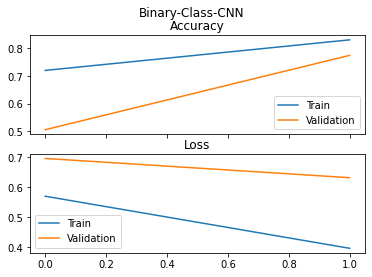

In [108]:
utils.evaluate('Binary-Class-CNN',res_bin_cnn,
                x_bin_test.reshape([x_bin_test.shape[0],187,1]),
                y_bin_test,is_multi=False,verbose=verbosity)

91/91 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.61      0.81      0.70       803
         1.0       0.92      0.80      0.86      2108

    accuracy                           0.80      2911
   macro avg       0.76      0.81      0.78      2911
weighted avg       0.83      0.80      0.81      2911

Binary-Class-MLP evaluation:
91/91 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8049
loss = 0.47804898023605347
accuarcy = 0.8048780560493469


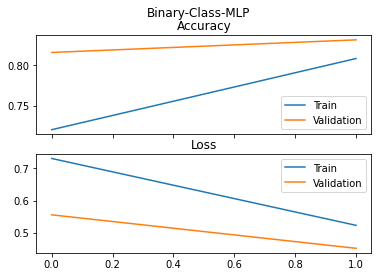

In [109]:
utils.evaluate('Binary-Class-MLP',res_bin_mlp,x_bin_test,
                y_bin_test,is_multi=False,verbose=verbosity)